# Lineare Regression

### DaLI &ndash; Basismodul
#### Prof. Dr. Richard Hirsch, 21. Dezember 2021

https://lectures1.gitlab.io/dali/LinearRegression

![QR code for this presentation](../assets/images/qr-code-200.png)

In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()

cm.update('livereveal', {'scroll': True})
cm.update('rise', {"theme": "thk"})

{'theme': 'thk'}

In [2]:
import numpy as np
from numpy import ma

from matplotlib import pyplot as plt
from matplotlib import ticker, cm
from matplotlib import animation as animation

from IPython import display

%matplotlib notebook

## Motivation

### Messdaten

- Die Wetter- und Luftqualitätsdaten sind Ergebnis einer *Messung*. 
- Bei der Messung wird eine physikalische Größe in ein Signal umgewandelt (häufig ein elektrisches). 
- Der genaue Zusammenhang zwischen Messgröße und Signal muss in der Regel erst durch eine *Kalibierung* etabliert werden.

#### Beispiel: 
Temperaturmessung mit Thermoelementen ([Seebeck-Effekt](https://de.wikipedia.org/wiki/Thermoelement#Seebeck-Effekt)):

<a title="Harke, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Thermocouple_voltages.PNG">
    <img width="600" alt="Thermocouple voltages" 
         src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Thermocouple_voltages.PNG/512px-Thermocouple_voltages.PNG">
</a>
<div class="source" style="text-align: right;">
    <a href="https://commons.wikimedia.org/wiki/File:Thermocouple_voltages.PNG">Harke</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>, via Wikimedia Commons
</div> 

### Messfehler

Bei der Messung selbst und beim Prozessieren in der Messkette entstehen **Messfehler**.

### lineare Regression

Häufig ist das Signal &ndash; wenigstens in guter Näherung &ndash; *direkt proportional* zur Messgröße oder es besteht zumindest ein *linearer Zusammenhang*. In diesen Fällen kann diese Korrelation quantifiziert werden: Eine *lineare Regression* liefert Schätzwerte für die Parameter einer mathematischen Funktion, die diesen Zusammenhang beschreibt.

### Korrelation von Messdaten

Diese Zusammenhänge sind aber nicht nur für die Messung an sich von Bedeutung; die Wissenschaft sucht natürlich vor allem in den Messdaten selbst nach Zusammenhängen (*Korrelationen*): Vielleicht steckt ja sogar ein *Kausalzusammenhang* dahinter.

Mit der Frage, ob sich die Muster in den Daten durch bloßen Zufall erklären lassen, beschäftigen wir uns gleich &ndash; im Abschnitt zu *Hypothesentests*.

**Kausalzusammenhänge** können induktiv nur aus prospektiv angelegten Studien gewonnen werden
(***Challenge, Dechallenge, Rechallenge***).


### Korrelation der Messdaten

Und wenn wir die Daten gemessen haben, interessierten uns die Zusammenhänge zwischen den Daten.

Einige dieser Zusammenhänge äußern sich im Diagramm als gerade Linien. Die Steigung hat meistens eine *wissenschaftliche* Bedeutung.

- *absoluter Wassergehalt* und *Enthalpie* hängen z. B. für eine *bestimmte Temperatur* über die *spezifische Wärmekapazität* zusammen.
- führt man Messungen zur Bestimmung der *spezifischen Wärmekapazität* durch, liegen die Messwerte nicht auf einer Geraden.
- Durch *lineare Regression* findet man die Gerade (und ihre Steigung) mit der sich die Messwerte am besten erklären lassen.

#### $h,x$-Diagramm nach Mollier

![Mollier_hx-1.png](./Mollier_hx/Mollier_hx-1.png)

#### $h,x$-Diagramm nach Mollier

![Mollier_hx-2.png](./Mollier_hx/Mollier_hx-2.png)

#### $h,x$-Diagramm nach Mollier

![Mollier_hx-3.png](./Mollier_hx/Mollier_hx-3.png)

#### $h,x$-Diagramm nach Mollier

![Mollier_hx-4.png](./Mollier_hx/Mollier_hx-4.png)

#### $h,x$-Diagramm nach Mollier

![Mollier_hx-5.png](./Mollier_hx/Mollier_hx-5.png)

#### $h,x$-Diagramm nach Mollier

<p>
  <div class="fragment fade-in" style="position: absolute; left: 30%; top: 60%; text-align: center">
  Die Ausgleichsgerade wird so gew&auml;hlt,</br>dass der <b>Inhalt der grauen Fl&auml;chen minimal</b> wird.
  </div>
  <img src="./Mollier_hx/Mollier_hx-6.png" alt="Mollier_hx-6.png">
</p>

## Was ist Regression?

### Wortbedeutung

Das Wort *Regression* bedeutet zunächst einmal nur *Zurückweichen* (vergl. *Aggression*).

Die Bedeutung in der Statistik begründet sich in einer Untersuchung von Francis Galton aus dem 19. Jahrhundert: Er beobachtete, dass die Nachfahren großer Eltern eher etwas kleiner und die Kinder kleiner Eltern tendenziell größer ausfallen. Er bezeichnete dieses Phänomen als &bdquo;Regression zur Mitte&ldquo;. Als seine Arbeit Einzug in die Statistik hielt, hat sich dann ein Bedeutungswandel des Wortes vollzogen.

Heute versteht man im statistischen Kontext unter *Regression* oder *Regressionsanalyse* ein Verfahren zur Anpassung von Parametern an ein Modell.

### Wortbedeutung

- *Regression* bedeutet wörtlich &bdquo;Zurückweichen&ldquo; (vergl. *Aggression*)
- Eine Studie aus dem 19. Jahrhundert, ergab, dass die Nachkommen großer Menschen in der  Regel kleiner ausfallen und umgekehrt. Dieses Verhalten wurde *Regression* genannt.
- Heute versteht man im statistischen Kontext unter *Regression* oder *Regressionsanalyse* ein Verfahren zur Anpassung von Parametern an ein Modell.

### Problemstellung

Durch zwei Punkte kann man eine Gerade legen (Euklid, Στοιχεία, 3. Jahrh. v. Chr.). In der analytischen Geometrie können diese beiden Punkte durch zwei Gleichungen mit zwei Unbekannten, den Geradenparametern **Achsenabschnitt** und **Steigung**, dargestellt werden.

Liegen mehr als zwei Datenpunkte vor, die zwar möglicherweise einem linearen Zusammenhang folgen, aber fehlerbehaftet sind, wird dieses Gleichungssystem überbestimmt.

Welche Gerade soll man nun durch diese Geradenpunkte legen?

Durch welche Gerade werden die Daten nun am besten beschrieben?

## Funktionsgleichung

Was zeichnet eine Gerade aus?

In [3]:
a0 = 1     # intercept
a1 = 0.5   # slope

x = (0, 10)
y = [ a0 + a1*x_ for x_ in x ]

In [62]:
def straight_line(β0=a0, β1=a1, x_max=10, **kwargs):
    
    x = (0, x_max)
    y = [ β0 + β1*x_ for x_ in x ]
    
    fig, ax = plt.subplots(**kwargs)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.plot(x, y, color='black')
    
    return fig, ax    

<IPython.core.display.Javascript object>


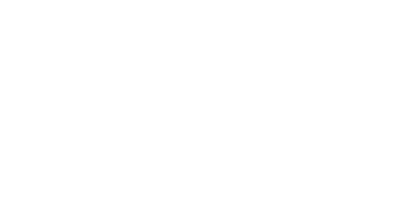

In [5]:
fig1, ax1 = straight_line()
ax1.set_axis_off()
fig1.savefig("assets/line_01.png")
plt.close()

![line_01.png](./assets/line_01.png)

In [6]:
def draw_slope_triangle(ax, x1=4, delta_x=2, β0=a0, β1=a1):
    """draw a slope triangle starting at x1 with width delta_x into ax"""
    
    ax.arrow(x1, β0 + β1*x1, delta_x, 0, color='gray')
    ax.text(x1 + 0.5*delta_x, β0 + β1*x1, r'$\Delta x$', 
            verticalalignment='top', horizontalalignment='center', fontsize=14)
    ax.arrow(x1 + delta_x, β0 + β1*x1, 0, delta_x*β1, color='gray')
    ax.text(x1 + delta_x, β0 + β1*(x1 + 0.5*delta_x), r'$\Delta y$', 
            verticalalignment='center', fontsize=14)

<IPython.core.display.Javascript object>


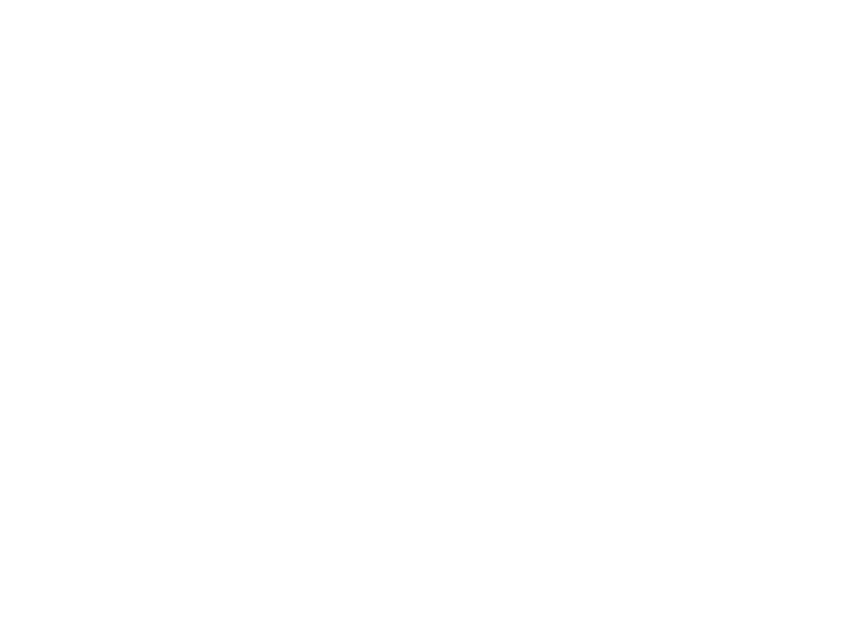

In [7]:
fig3, ax3 = plt.subplots()

def animate(x1, β0=a0, β1=a1, delta_x=2):
    ax3.clear()
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_xlim((0, x[-1]))
    ax3.set_axis_off()
    
    l0 = ax3.arrow(0, a0, 10, 10*a1, color='black')
    lx = ax3.arrow(x1, β0 + β1*x1, delta_x, 0, color='gray')
    tx = ax3.text(x1 + 0.5*delta_x, β0 + β1*x1, r'$\Delta x$', 
            verticalalignment='top', horizontalalignment='center', fontsize=14)
    ly = ax3.arrow(x1 + delta_x, β0 + β1*x1, 0, delta_x*β1, color='gray')
    ty = ax3.text(x1 + delta_x, β0 + β1*(x1 + 0.5*delta_x), r'$\Delta y$', 
            verticalalignment='center', fontsize=14)
    tm = ax3.text(5, 1, r'$m = \frac{\Delta y}{\Delta x}$', 
                  verticalalignment='bottom', fontsize=14)
    return [l0, lx, tx, ly, ty, tm]

anim = animation.FuncAnimation(fig3, animate, frames=np.arange(1, 7, 0.1), 
                               interval=5, repeat=False)
# with open("assets/slope.html", "w") as html:
#    print(anim.to_html5_video(), file=html)
anim.save('assets/slope.mp4', writer=animation.FFMpegWriter(fps=60))
plt.close()

<video alt="Steigung der Geraden" controls>
    <source src="assets/slope.mp4" type="video/mp4">
</video>

Eine Gerade hat überall die gleiche Steigung.

<IPython.core.display.Javascript object>


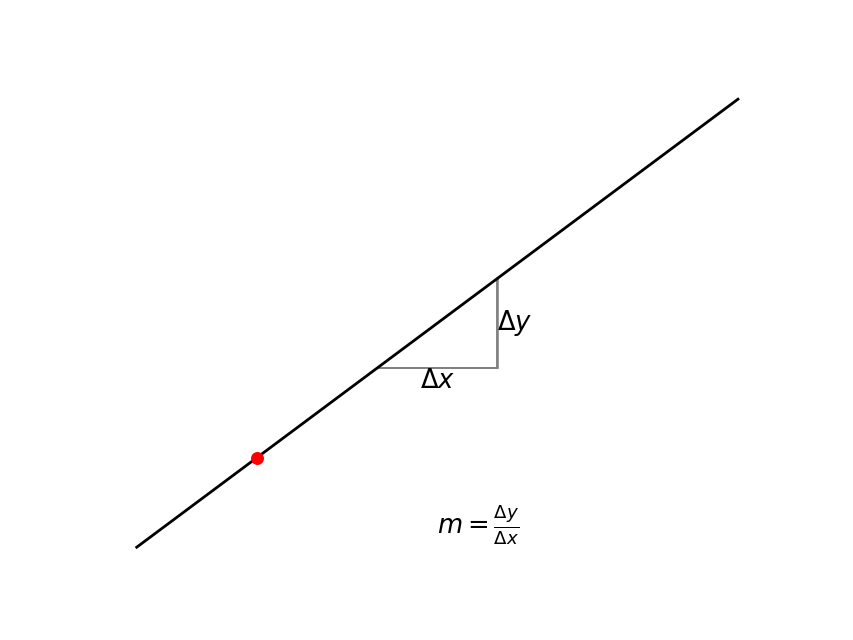

In [8]:
x_max = 10
fig2, ax2 = straight_line()
ax2.set_axis_off()

draw_slope_triangle(ax2)
ax2.plot(2, a0 + 2*a1, 'ro')

ax2.text(0.5*x_max, 1, r'$m = \frac{\Delta y}{\Delta x}$', 
         verticalalignment='bottom', fontsize=14)

fig2.savefig('assets/line_02.png')
# plt.close()

![line_02.png](./assets/line_02.png)

Durch ihre Steigung und einem beliebigen Punkt auf der Geraden ist diese eindeutig bestimmt.

### kartesische Koordinaten

In einem *kartesischen Koordinatensystem* kann man die Gerade auch als Graphen einer Funktion (Polynom 1. Grades) auffassen. 

Nun wird jeder Punkt der Geraden durch die **Funktionsgleichung**
$$ y = \alpha_0 + \alpha_1 x $$
algebraisch zugänglich.

Wieder ist die Gerade durch ihre Steigung $a_1$ und einem Punkt &ndash; nämlich $(0, y(0))$, dem Schnittpunkt mit der $y$-Achse &ndash; eindeutigt bestimmt.

<IPython.core.display.Javascript object>


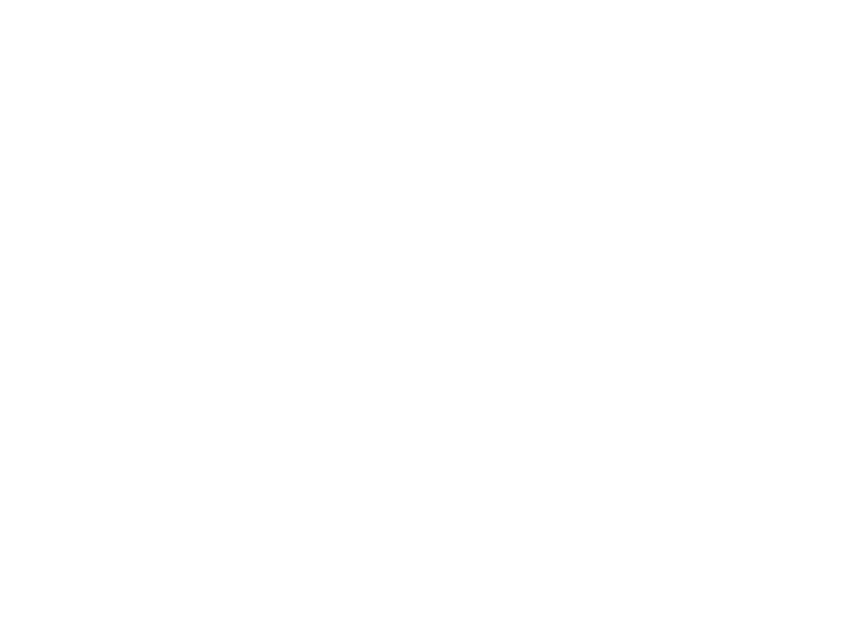

In [9]:
fig4, ax4 = straight_line()

(x0, _) = ax4.get_xlim()
(y0, _) = ax4.get_ylim()

x1 = 6
y1 = a0 + x1*a1

ax4.plot(x1, y1, 'ok')
ax4.text(x1+0.1, y1-0.1, f"({x1}, {y1:.0f})", verticalalignment='top')

helper_lines = [
    ax4.plot((x0, x1), (y1, y1), color='gray', linestyle='dashed'),
    ax4.plot((x1, x1), (y0, y1), color='gray', linestyle='dashed')
]
fig4.savefig("assets/line_04.png")

<IPython.core.display.Javascript object>


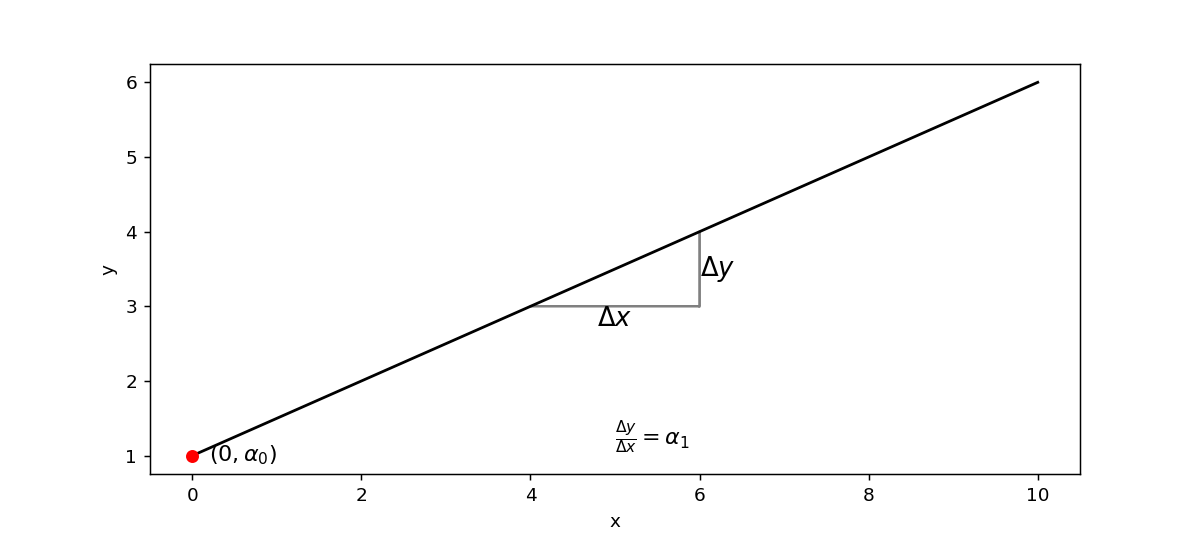

In [67]:
fig5, ax5 = straight_line(figsize=((9, 4)))

# ax5.text(x1+0.1, y1-0.1, f"({x1}, {y1:.0f})", verticalalignment='top')ax4.text(2, 5, r"$y = \alpha_0 + \alpha_1 x$")

(xlim_x, _) = ax5.get_xlim()

ax5.plot(0, a0, 'or')
# ax5.plot((0, 0), (0, a0), color='gray', linestyle='dashed'),
ax5.text(0.2, a0, r'$(0,\alpha_0)$', 
         verticalalignment='center',
         horizontalalignment='left', 
         fontsize=12)

draw_slope_triangle(ax5)
ax5.text(5, 1, r'$\frac{\Delta y}{\Delta x}=\alpha_1$', 
                  verticalalignment='bottom', fontsize=12)

fig5.savefig("assets/line_05.png")
# plt.close()

![line_04.png](./assets/line_04.png)

Damit wird jeder Punkt auf der Geraden algebraisch zugänglich.

## Welches ist die beste Gerade?

### Funktionsgleichung

- Eine Gerade ist durch ihre *Steigung* und *einen Punkt* eindeutig bestimmt.
- In einem kartesischen Koordinatensystem kann die Gerade als Graph eines Polynoms 1.&nbsp;Grades beschrieben werden: $$y = \alpha_0 + \alpha_1 x$$
- $\alpha_0$ ist der Funktionswert am Punkt $x = 0$ (*$y$-Achsenabschnitt*).
- $\alpha_1$ ist die Steigung.

![line_05.png](./assets/line_05.png)

### Warum kleinste Quadrate?

- Die Summe der Abstandsquadrate ist analytisch leicht handhabbar (überall differenzierbar).
- Unter gewissen Voraussetzungen sind die Kleinste-Quadrate Schätzer die besten linearen erwartungstreuen Schätzwerte (*best linear unbiased estimator BLUE*) ([Satz von Gauß-Markow](https://de.wikipedia.org/wiki/Satz_von_Gau%C3%9F-Markow)).

#### Nachteile der Methode:
- Die Methode der kleinsten Quadrate ist sehr anfällig gegen Punkte, die nicht der Modellgleichung folgen ([Schieweck 2010](https://num.math.uni-goettingen.de/picap/pdf/E693.pdf)).

### Bestimmung der Parameter

#### Modelldaten

Wir leisten uns den Luxus, bei der Bestimmung von $\beta_0$ und $\beta_1$ mit Modelldaten zu arbeiten, die wir selbst durch eine *Simulation* aus einem Paar vorgegebener Parameter $\alpha_0$ und $\alpha_1$ erzeugen. Wir kennen also das richtige Ergebnis schon vorher, und können unsere Verfahren entsprechend bewerten.

Dazu berechnen wir zu einem vorgegebenen Satz von $x$-Werten die entsprechenden $y$-Werte und beaufschlagen sie mit einem kleinen Fehler&nbsp;$\epsilon$. Dieses $\epsilon$ ist *normalverteilt* mit einem Mittelwert von&nbsp;0 und einer Standdardabweichung von $\sigma_\epsilon$.
$$
  y_i = \alpha_0 + \alpha_1 x_i + \epsilon,\qquad\text{für $i\in\{1, \ldots, n\}$}
$$

#### Modelldaten

$$
  y_i = \alpha_0 + \alpha_1 x_i + \epsilon,\qquad\text{für $i\in\{1, \ldots, n\}$}
$$

Der Fehler ist normalverteilt: 
$$
  \epsilon \sim \mathcal{N}(0, \sigma_\epsilon)
$$

In [41]:
import pandas as pd

from numpy.random import default_rng
rng = default_rng(1313)

In [42]:
α0, α1 = (1, 0.5)           # die "echten" Werte für Achsenabschnitt und Steigung
𝜎_ε = 0.2                   # Standardabweichung der Fehler
n = 10                      # Anzahl der simulierten Datenpunkte

x = np.sort(10*rng.random(size=n))
y = α0 + α1*x + rng.normal(scale=𝜎_ε, size=n)

In [43]:
# save the data for processing with R or Excel
model_df = pd.DataFrame(zip(x, y), columns=["x", "y"])
model_df.to_csv('assets/modeldata_1.csv')

<IPython.core.display.Javascript object>


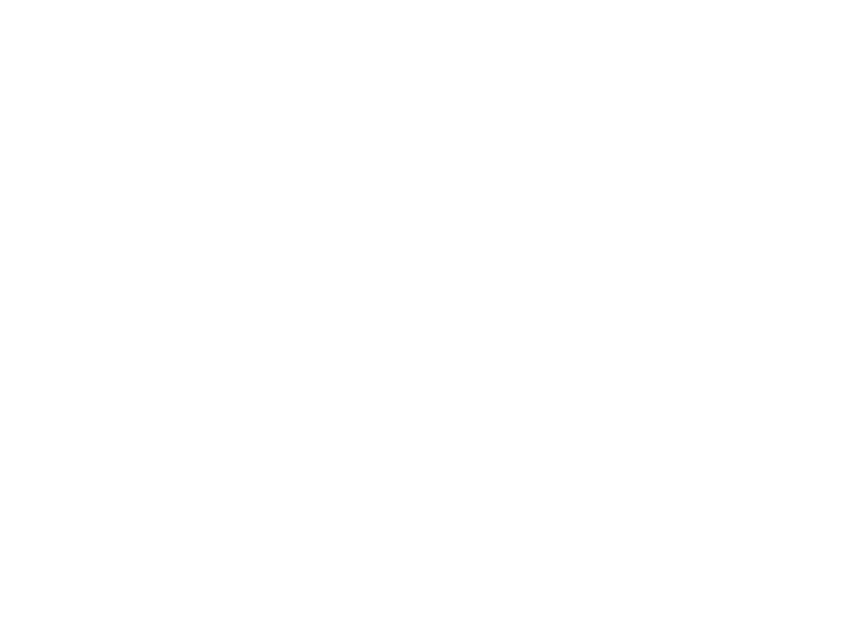

In [44]:
fig6, ax6 = plt.subplots()

fig6.suptitle("simulierte Modelldaten")
ax6.set_xlabel("x")
ax6.set_ylabel("y")
ax6.set_xlim((0, 10))
ax6.set_ylim((0, 7))

ax6.plot(x, y, ".b")
ax6.plot((0, 10), (α0, α0+10*α1), color="gray", linestyle="dashed", label="Vorgabe")
ax6.legend()

fig6.savefig('assets/model1_data.png')
plt.close()

![model1_data.png](./assets/model1_data.png)

#####  Qualitätsfunktion

In [45]:
def sum_squared_distances(β0, β1):
    distances = y - β0 - β1*x
    return np.sum(distances**2)

In [46]:
# analytische Lösung
def lin_reg(x, y):
    """linear regression on x and y, returns intercept and slope"""
    S1  = len(x)
    Sx  = np.sum(x)
    Sy  = np.sum(y)
    Sxx = np.sum(x**2)
    Sxy = np.sum(x*y)
    
    slope = (S1*Sxy - Sx*Sy)/(S1*Sxx - Sx*Sx)
    intercept = (Sy - slope*Sx)/S1
    
    return intercept, slope

β0_opt, β1_opt = lin_reg(x, y) 

In [47]:
X, Y = np.meshgrid(np.linspace(a0-4, a0+4, 100), np.linspace(a1-1, a1+1, 100))

Z = np.array([ sum_squared_distances(β0, β1) for β0, β1 in zip(X.flatten(), Y.flatten())])
Z.shape=(len(X), len(Y))

<IPython.core.display.Javascript object>


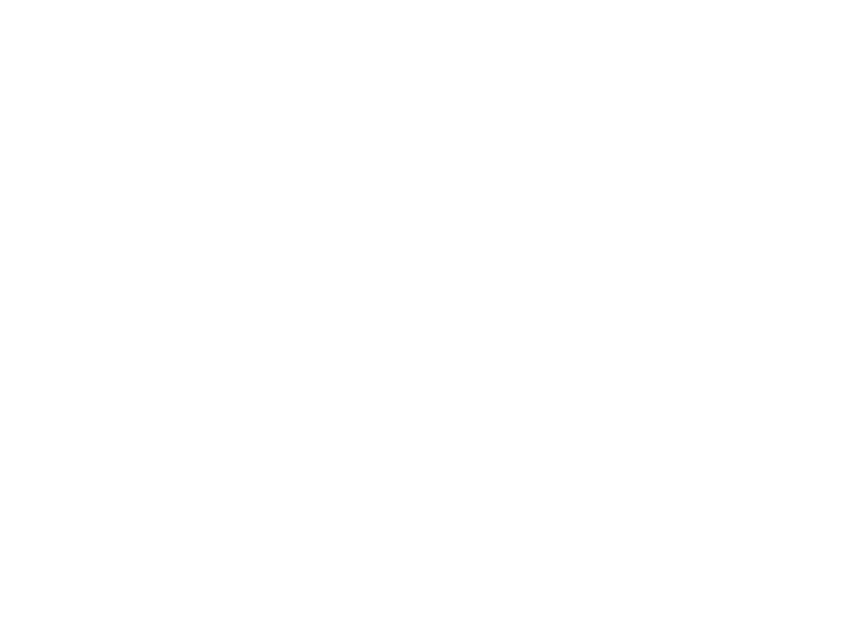

In [48]:
X, Y = np.meshgrid(np.linspace(a0-0.5, a0+0.5, 100), np.linspace(a1-0.15, a1+0.15, 100))

Z = np.array([ sum_squared_distances(β0, β1) for β0, β1 in zip(X.flatten(), Y.flatten())])
Z.shape=(len(X), len(Y))

fig_ssd, ax_ssd = plt.subplots()
fig_ssd.suptitle("Summe der Abweichungsquadrate")

ax_ssd.set_xlabel('β₀')
ax_ssd.set_ylabel('β₁')

cs = ax_ssd.contourf(X, Y, Z, levels=[0, 0.5, 1, 2, 4, 8, 16, 32], cmap=cm.magma_r)
cbar = fig_ssd.colorbar(cs)

fig_ssd.savefig('assets/ssd_01.png')
plt.close()

![ssd_01.png](./assets/ssd_01.png)

In [49]:
fig_ssd.suptitle("Summe der Abweichungsquadrate")

ax_ssd.plot((a0-0.5, β0_opt, β0_opt), (β1_opt, β1_opt, a1-0.15), 
             color='gray', linestyle='dashed')
ax_ssd.text(β0_opt+0.02, β1_opt, "Stichprobe", 
             verticalalignment='center')

fig_ssd.savefig('assets/ssd_02.png')
plt.close()

![ssd_02.png](./assets/ssd_02.png)

In [50]:
# fig_ssd.suptitle("Parameter der Stichprobe und der Grundgesamtheit")

ax_ssd.plot(a0, a1, "xk")
ax_ssd.text(a0-0.02, a1, "Grundgesamtheit", 
            horizontalalignment='right', verticalalignment='bottom')

fig_ssd.savefig('assets/ssd_03.png')
plt.close()

![ssd_03.png](./assets/ssd_03.png)

Die begrenzete Information aus den Messwerten lässt es nicht zu, die realen (vorgegebenen) Parameter $a_1$ und $a_0$ der Grundgesamtheit zu ermitteln.

Hier eine vergrößerte Darstellung mit den wahren Parametern:

## Iterative Lösung

Zunächst wollen wir versuchen, die optimalen Werte für $\beta_0$ und $\beta_1$ ohne höhere Mathematik zu bestimmen. Dazu probieren wir, ob der folgende *Algorithmus* zum Erfolg führt:

### Algorithmus zur iterativen Bestimmung der Geradenparameter

1. lege Startwerte für die gesuchten Parameter fest (z. B. Achsenabschnitt und Steigung der Geraden durch den ersten und letzten Datenpunkt).
2. berechne den Wert der Qualitätsfunktion für die gewählten $\beta_0$ und $\beta_1$.
3. verändere den Wert von $\beta_0$ um einen kleinen, zufälligen Betrag;
4. berechne die Qualitätsfunktion für die neuen Wert von $\beta_0$ (und dem alten $\beta_1$).
5. Wenn der neue Wert der Qualitätsfunktion kleiner (also besser) ist als der alte, behalte das neue $\beta_0$ bei, falls nicht, verwerfe es.
6. verändere die Werte von $\beta_1$ um einen kleinen, zufälligen Betrag;
7. berechne die Qualitätsfunktion für den neuen Wert von $\beta_1$.
8. Wenn der neue Wert der Qualitätsfunktion kleiner (also besser) ist als der alte, behalte das neue $\beta_1$ bei, falls nicht, verwerfe es.
9. wiederhole die Schritte 3 bis 8 solange, bis ein Abbruchskriterium erfüllt ist.

Wir brechen die Iteration ab, wenn sich der Wert von $Q(\beta_0, \beta_1)$ über 20 Wiederholungen nicht verbessert.

### Festlegen der Startwerte

In [51]:
𝛽1 = (y[-1] - y[0])/(x[-1] - x[0])
𝛽0 = y[0] - 𝛽1*x[0]

In [52]:
ssd = sum_squared_distances(β0, β1)

<IPython.core.display.Javascript object>


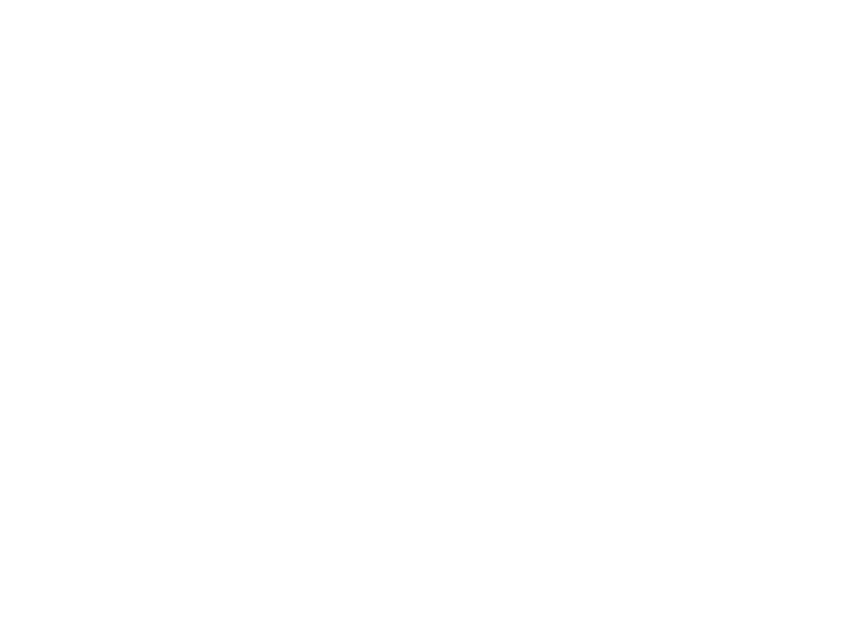

In [53]:
fig7, ax7 = plt.subplots()
fig7.suptitle("Parameter vor der Iteration")

ax7.set_xlabel("x")
ax7.set_ylabel("y")
ax7.set_xlim((0, 10))
ax7.set_ylim((0, 7))

ax7.plot(x, y, ".b")
ax7.plot(x, 𝛽0 + x*𝛽1, color="gray", linestyle="dashed")

ax7.text(7, 0.9, rf"$\beta_0 = {𝛽0:9.4f}$")
ax7.text(7, 0.6, rf"$\beta_1 = {𝛽1:9.4f}$")
ax7.text(7, 0.3, rf"$Q\; = {ssd:9.4f}$")

fig7.savefig('assets/iteration_01.png')
plt.close()

![iteration_01.png](./assets/iteration_01.png)

### Iteration

In [54]:
σ_rel = 0.01
max_no_changes = 20

results = [(0, β0, β1, ssd)]
counter = 0
no_changes = 0

while no_changes < max_no_changes:
    counter += 1
    no_changes += 1
    
    # try to improve β0
    β0_test = rng.normal(β0, σ_rel)
    ssd_test  = sum_squared_distances(β0_test, β1)
    if ssd_test < ssd: # success: conserve achievment
        β0 = β0_test
        ssd = ssd_test
        no_changes = 0
        
    # try to improve β1
    β1_test = rng.normal(β1, σ_rel)
    ssd_test  = sum_squared_distances(β0, β1_test)
    if ssd_test < ssd: # success: conserve achievment
        β1 = β1_test
        ssd = ssd_test
        no_changes = 0
        
    if no_changes == 0:  # if there was an improvement
        results.append( (counter, β0, β1, ssd) )

### Ergebnis

Aus der Liste mit den Resultaten machen wir einen [Pandas](https://www.pandas.org) Dataframe.

In [55]:
results_df = pd.DataFrame(results, columns=['iteration', 'β0', 'β1', 'ssd'])
results_df

iteration        β0        β1       ssd
0           0  1.145602  0.471117  0.320934
1           1  1.135568  0.471117  0.311509
2           3  1.124746  0.471117  0.303601
3           4  1.114509  0.471117  0.298276
4           7  1.107409  0.471117  0.295814
5           9  1.095042  0.471117  0.293933
6          15  1.095042  0.473080  0.291644
7          18  1.090389  0.473080  0.290911
8          20  1.084439  0.473080  0.290604
9          21  1.084439  0.473485  0.289998
10         22  1.084439  0.475596  0.288222
11         23  1.080207  0.475596  0.287482
12         24  1.080207  0.477127  0.287067
13         26  1.059112  0.480136  0.282897
14         28  1.051778  0.480136  0.282577
15         36  1.053407  0.480136  0.282555
16         39  1.053407  0.480577  0.282296
17         40  1.053407  0.480837  0.282192
18         45  1.049364  0.480837  0.282090
19         57  1.049364  0.482595  0.281669
20         59  1.042476  0.482595  0.281165
21         72  1.042476  0.483434  0.281015
22         77  1.035472  0.483434  0.280950
23         83  1.040131  0.483434  0.280884
24         87  1.038573  0.483434  0.280858
25        104  1.038573  0.483882  0.280772
26        108  1.038275  0.483882  0.280760
27        114  1.038275  0.483951  0.280754
28        115  1.034627  0.483951  0.280736
29        123  1.034884  0.483951  0.280728
30        135  1.037085  0.483951  0.280719
31        136  1.036206  0.483951  0.280711

<IPython.core.display.Javascript object>


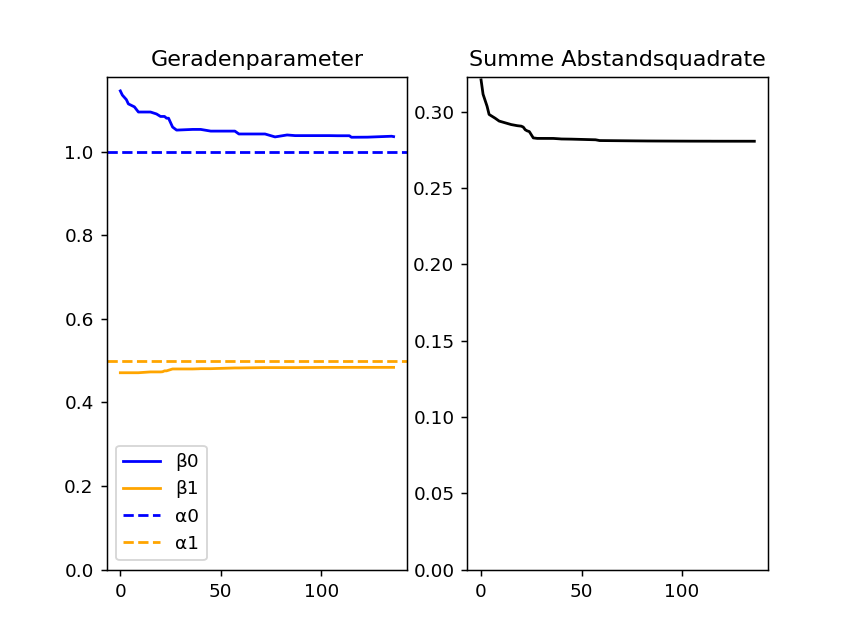

In [56]:
fig8, (ax8b, ax8q) = plt.subplots(ncols=2)

ax8b.set_title('Geradenparameter')
ax8b.plot(results_df.iteration, results_df.β0, color='blue', label='β0')
ax8b.plot(results_df.iteration, results_df.β1, color='orange', label='β1')
ax8b.axhline(α0, color='blue',   linestyle='dashed', label='α0')
ax8b.axhline(α1, color='orange', linestyle='dashed', label='α1')
ax8b.set_ylim(bottom=0)
ax8b.legend()

ax8q.set_title('Summe Abstandsquadrate')
ax8q.plot(results_df.iteration, results_df.ssd, color='black')
ax8q.set_ylim(bottom=0)

fig8.savefig('assets/iteration_02.png')
# plt.close()

### Residuen

Die Abweichungen zwischen der Modellfunktion mit den gefitteten Parametern und den Datenpunkten werden *Residuen* genannt.

Sie sollten zufällig um die Nulllinie verteilt sein. Systematische Abweichungen würden darauf hindeuten, dass das Modell nicht mächtig genug ist, die Daten zu beschreiben.

In [27]:
residuals = y - β0 - β1*x

<IPython.core.display.Javascript object>


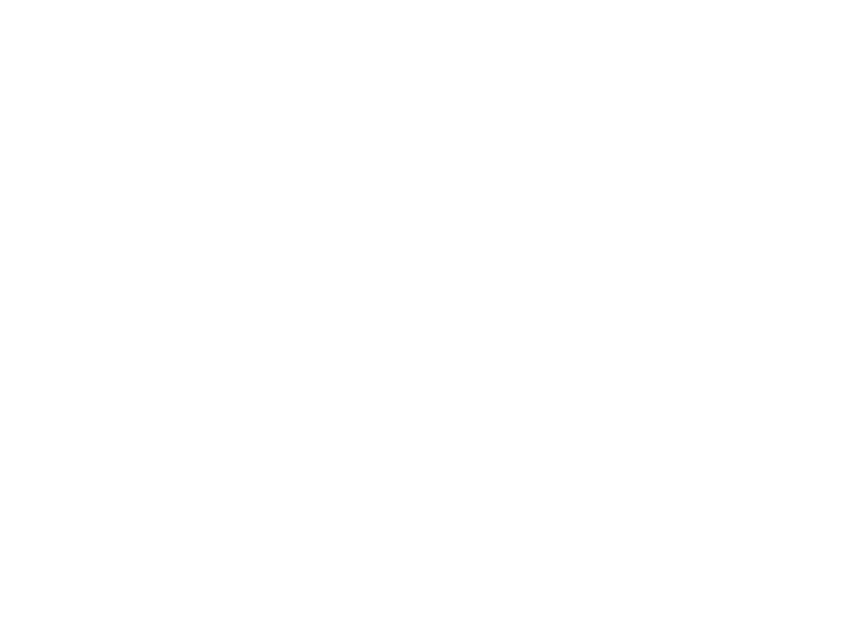

In [28]:
fig9, (ax9l, ax9r) = plt.subplots(nrows=2, sharex=True)
fig9.suptitle("Parameter nach der Iteration")

ax9l.set_title("Ausgleichsgerade")
ax9l.set_ylabel("y")
ax9l.set_xlim((0, 10))
ax9l.set_ylim((0, 7))

ax9l.plot(x, y, ".b")
ax9l.plot(x, 𝛽0 + x*𝛽1, color="gray", linestyle="dashed")

ax9l.text(7, 1.6, rf"$\beta_0 = {𝛽0:9.4f}$")
ax9l.text(7, 1.0, rf"$\beta_1 = {𝛽1:9.4f}$")
ax9l.text(7, 0.4, rf"$ssd\; = {ssd:9.4f}$")
       
ax9r.set_title("Residuen")
ax9r.set_xlabel("x")
ax9r.set_ylabel("Δy")
ax9r.set_xlim((0, 10))
ax9r.axhline(0, color="black")

for x_, r in zip(x, residuals):
    ax9r.arrow(x_, 0, 0, r, color='gray', linewidth=0.1)
ax9r.plot(x, residuals, "ob")

fig9.savefig('assets/residuals_01.png')
plt.close()

![residuals_01.png](./assets/residuals_01.png)

## analytische Lösung

Bei linearen Modellen kann man $\beta_0$ und $\beta_1$ auch direkt aus den Daten berechnen.

## Qualitätsfunktion

![ssd_02.png](./assets/ssd_02.png)

<IPython.core.display.Javascript object>


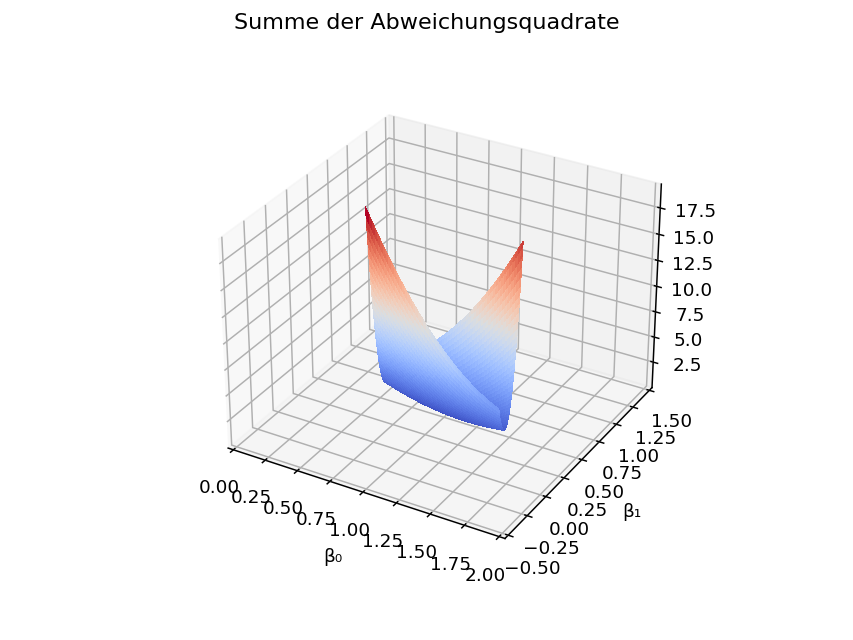

In [29]:
fig_q, ax_q = plt.subplots(subplot_kw=dict(projection='3d'))
fig_q.suptitle("Summe der Abweichungsquadrate")

ax_q.set_xlabel('β₀')
ax_q.set_ylabel('β₁')
ax_q.set_xlim(0, 2)
ax_q.set_ylim(-0.5, 1.5)

surf = ax_q.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#### Schnitt in Richtung β₀

<IPython.core.display.Javascript object>


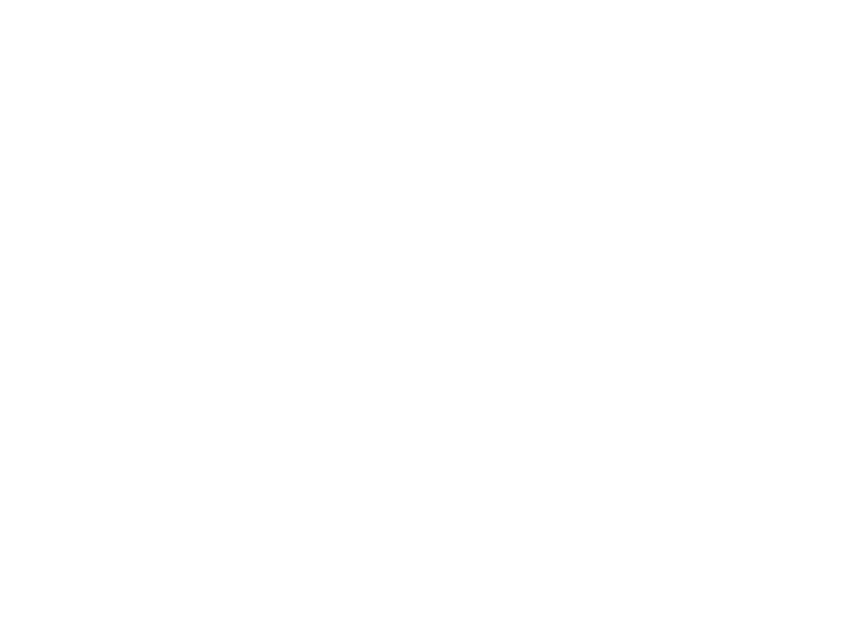

In [30]:
fig_q_b0, ax_q_b0 = plt.subplots()
fig_q_b0.suptitle("Schnitt in β₀-Richtung")

x_b0 = np.linspace(-1, 3, 100)
y_b0 = 0.20*(x_b0 - a0)**2 + 0.5
dy_b0 = 0.4*(x_b0 - a0)
t_b0  = np.full_like(x_b0, 0.5)

ax_q_b0.set_xlabel('β₀')
ax_q_b0.set_ylabel('SSD')
ax_q_b0.set_ylim(0, 2)
ax_q_b0.set_yticks([])

ax_q_b0.plot(x_b0, y_b0, color='blue', label='SSD')
ax_q_b0.plot(x_b0, t_b0, color='gray', label='Tangente')

# ax_q_b0.plot(x_b0, dy_b0, label='Ableitung')
plt.legend()

fig_q_b0.savefig('assets/ssd_b0.png')
plt.close()

![ssd_b0.png](./assets/ssd_b0.png)

Am Minimum ist die Steigung der Tangente am Graphen der Funktion null.

Am Minimum ist die **1. Ableitung der Qualitätsfunktion nach β₀** identisch null.

#### Schnitt in Richtung β₁

<IPython.core.display.Javascript object>


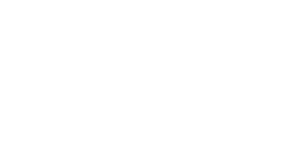

In [31]:
fig_q_b1, ax_q_b1 = plt.subplots()
fig_q_b1.suptitle("Schnitt in β₁-Richtung")

x_b1 = np.linspace(-1, 3, 100)
y_b1 = 1.4*(x_b1 - a1)**2 + 0.5
dy_b1 = 2.8*(x_b1 - a1)
t_b1  = np.full_like(x_b1, 0.5)

ax_q_b1.set_xlabel('β₁')
ax_q_b1.set_ylabel('SSD')
ax_q_b1.set_ylim(0, 2)
ax_q_b1.set_yticks([])

ax_q_b1.plot(x_b1, y_b1, color='blue', label='SSD')
ax_q_b1.plot(x_b1, t_b1, color='gray', label='Tangente')
# ax_q_b0.plot(x_b1, dy_b1, label='Ableitung')

plt.legend()

fig_q_b1.savefig("assets/sdd_b1.png")
plt.close()

![sdd_b1.png](./assets/sdd_b1.png)

Am Minimum ist die **1. Ableitung der Qualitätsfunktion nach β₁** identisch null.

### Berechnung der optimalen β₀ und β₁

Für die Berechnung der optimalen Werte für $\beta_0$ und $\beta_1$ bildet man die (partiellen) Ableitungen von 
$$
  Q(\beta_0,\beta_1) = \sum_{i=1}^n (\beta_0 + \beta_1 x_i - y_i)^2
$$
nach $\beta_0$ bzw. $\beta_1$ und bestimmt die jeweiligen Nullstellen:

$$
\begin{align*}
  Q_{\beta_0} &= \sum_{i=1}^n\; \hphantom{x_i\cdot{}}2\cdot(\beta_0 + \beta_1 x_i - y_i) = 0 \\
  Q_{\beta_1} &= \sum_{i=1}^n\; x_i\cdot 2\cdot (\beta_0 - \beta_1 x_i - y_i) = 0 \\
\end{align*}
$$

Wir erhalten zwei Gleichungen (mit den zwei Unbekannten $\beta_0$ und $\beta_1$):

$$
\begin{align*}
  S_{y}  &= \beta_0 S_1 + \beta_1 S_{x} \\[2ex]
  S_{xy} &= \beta_0 S_{x} + \beta_1 S_{xx}\\
\end{align*}
$$

mit 
$$
\begin{align*}
  S_1   &= n, \\
  S_{x} &= \sum_{i=1}^n x_i, &
  S_{y} &= \sum_{i=1}^n y_i, \\
  S_{xx} &= \sum_{i=1}^n x_i^2, &
  S_{xy} &= \sum_{i=1}^n x_i y_i
\end{align*}
$$

&hellip; und können sie nach $\beta_0$ und $\beta_1$ auflösen:

$$
\begin{align*}
  \beta_1 &= \frac{S_1 S_{xy} - S_x S_y}{S_1 S_{xx} - S_x S_x} \\[2ex]
  \beta_0 &= \frac{S_y - \beta_1 S_x}{n}% = \bar{y} - \beta_1 \bar{x}
\end{align*}
$$

In [32]:
S1  = len(x)
Sx  = np.sum(x)
Sy  = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

β1_analytisch = (S1*Sxy - Sx*Sy)/(S1*Sxx - Sx*Sx)
β0_analytisch = (Sy - β1_analytisch*Sx)/S1
ssd_analytisch = sum_squared_distances(β0_analytisch, β1_analytisch)

print(f"analytische Lösung für β0:     {β0_analytisch:8.4f}")
print(f"analytische Lösung für β1:     {β1_analytisch:8.4f}")
print(f"Summe der Abweichungsquadrate: {ssd_analytisch:8.4f}")

analytische Lösung für β0:       0.9905
analytische Lösung für β1:       0.5064
Summe der Abweichungsquadrate:   0.3194


<IPython.core.display.Javascript object>


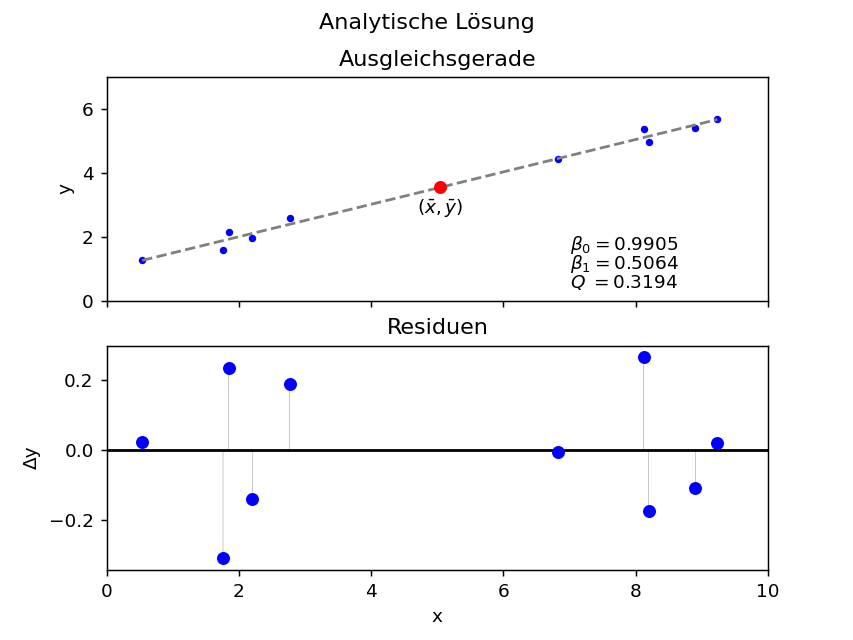

In [33]:
fig10, (ax10l, ax10r) = plt.subplots(nrows=2, sharex=True)
fig10.suptitle("Analytische Lösung")

ax10l.set_title("Ausgleichsgerade")
ax10l.set_ylabel("y")
ax10l.set_xlim((0, 10))
ax10l.set_ylim((0, 7))

ax10l.plot(x, y, ".b")
ax10l.plot(x, 𝛽0_analytisch + x*𝛽1_analytisch, color="gray", linestyle="dashed")

ax10l.text(7, 1.6, rf"$\beta_0 = {𝛽0_analytisch:9.4f}$")
ax10l.text(7, 1.0, rf"$\beta_1 = {𝛽1_analytisch:9.4f}$")
ax10l.text(7, 0.4, rf"$Q\; = {ssd_analytisch:9.4f}$")
       
ax10r.set_title("Residuen")
ax10r.set_xlabel("x")
ax10r.set_ylabel("Δy")
ax10r.set_xlim((0, 10))
ax10r.axhline(0, color="black")

for x_, r in zip(x, residuals):
    ax10r.arrow(x_, 0, 0, r, color='gray', linewidth=0.1)
ax10r.plot(x, residuals, "ob")
fig10.savefig('assets/analytical_01.png')

ax10l.plot(Sx/S1, Sy/S1, 'or')
ax10l.text(Sx/S1, Sy/S1 - 0.8, r'$(\bar{x}, \bar{y})$', horizontalalignment='center')
fig10.savefig('assets/analytical_02.png')
# plt.close()

![analytical_01.png](./assets/analytical_01.png)

#####  Vorteile der analytischen Lösung

- liefert immer die optimalen Parameter
- sehr schnell zu berechnen
- gewährt neue Einsichten

##### Korollar aus der analytischen Lösung

\begin{align*}
   \beta_0 &= \frac{S_y - \beta_1 S_x}{n} \\
           &= \frac{1}{n}\,S_y - \beta_1\cdot\frac{1}{n} S_x \\[2ex]
           &= \bar{y} - \beta_1 \cdot \bar{x} 
\end{align*}

Die Ausgleichsgerade geht also immer durch den Schwerpunkt der Datenpunkte.

![analytical_02.png](./assets/analytical_02.png)

## Ergänzungen

### Residuenbetrachtung bei insuffizientem Modell (*Underfitting*)

#### Modelldaten

Die Daten stammen tatsächlich von einem Polynom 3. Grades.

In [34]:
i3 = (-1, 1)              # interval to draw samples from
a3, c3 = -0.1, 1.1        # parameters of polynomial
x3 = (i3[1] - i3[0])*rng.random(20) + i3[0]  # from interval i3
y3 = a3*x3**3 + c3*x3 + rng.normal(0, 0.001, size=len(x3))

β0_3, β1_3 = lin_reg(x3, y3)

<IPython.core.display.Javascript object>


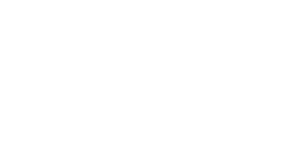

In [35]:
fig_m3, ax_m3 = plt.subplots()
fig_m3.suptitle("Modelldatensatz P3")

ax_m3.set_title("lineare Regression")
ax_m3.set_xlabel("x")
ax_m3.set_ylabel("y")
ax_m3.set_axis_off()
ax_m3.plot(i3, β0_3 + β1_3*np.array(i3), color='gray', linestyle='dashed')
ax_m3.plot(x3, y3, 'ob')

fig_m3.savefig('assets/underfit_01.png')
plt.close()

![underfit_01.png](./assets/underfit_01.png)

#### Residuen

In [36]:
residuals_3 = y3 - β0_3 - β1_3*x3

<IPython.core.display.Javascript object>


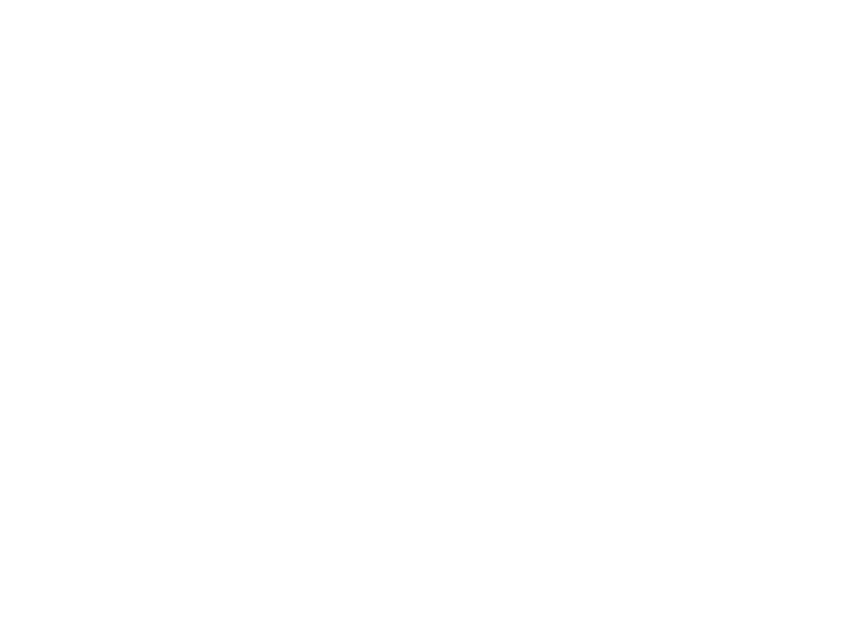

In [37]:
fig_r3, ax_r3 = plt.subplots()
fig_r3.suptitle("Modelldatensatz P3")

ax_r3.set_title("Residuen")
ax_r3.set_xlabel("x")
ax_r3.set_ylabel("Δy")
ax_r3.set_axis_off()
ax_r3.axhline(0, color="black")

for x_, r_ in zip(x3, residuals_3):
    # ax_r3.arrow(x_, 0, 0, r_, color='gray') # , linewidth=0.1)
    ax_r3.plot((x_, x_), (0, r_), color='gray', linewidth=0.2)
ax_r3.plot(x3, residuals_3, "ob")

fig_r3.savefig('assets/underfit_02.png')
plt.close()

![underfit_02.png](./assets/underfit_02.png)

Die Residuen schwanken nicht zufällig um die Nulllinie; es liegen systematische Abweichungen vor. Hier wäre ein komplexeres Modell angebracht: kubische, statt lineare Regression, d. h. Anpassung an ein Polynom 3. Grades.

Möglicherweise kann man im Interpolationsintervall mit den Abweichungen leben, aber auf keinen Fall darf man **extrapolieren**.

#### Extrapolation

<IPython.core.display.Javascript object>


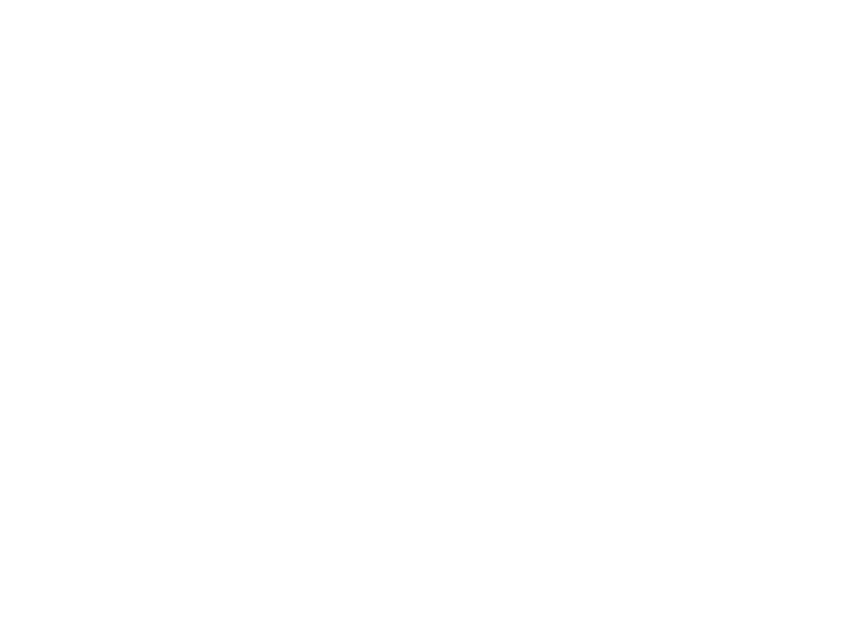

In [38]:
fig_e3, ax_e3 = plt.subplots()
fig_e3.suptitle("Extrapolation mit Modelldatensatz P3")

def animate(lim):
    ax_e3.clear()

    ax_e3.set_xlabel("x")
    ax_e3.set_ylabel("y")
    ax_e3.set_xlim((-lim, lim))
    ax_e3.set_ylim((-lim, lim))
    ax_e3.plot((-lim, lim), β0_3 + β1_3*np.array([-lim, lim]), 
               color='gray', linestyle='dashed')
    ax_e3.plot(x3, y3, 'ob')
    
    ex = np.linspace(-lim, lim, 100)
    ax_e3.plot(ex, a3*ex**3 + c3*ex, color='black')
    
anim_3 = animation.FuncAnimation(fig_e3, animate, 
                                 frames=np.linspace(i3[1], 4*i3[1], num=100),
                                 interval=15, repeat=False)
video_3 = anim_3.to_html5_video()

anim_3.save('assets/underfit.mp4', writer=animation.FFMpegWriter(fps=40))
plt.close()

<video alt="Steigung der Geraden" controls>
    <source src="assets/underfit.mp4" type="video/mp4">
</video>

### *Overfitting*

Es ist nicht schwierig Funktionen zu finden, die genau durch alle Datenpunkte laufen (z. B. [Lagrange-Interpolationspolynome](https://en.wikipedia.org/wiki/Lagrange_polynomial)). Aber die habe in der Regel nichts mit der physikalischen Realität zu tun &ndash; wie auch, wenn sie nicht einmal die Möglichkeit einbeziehen, dass Messdaten fehlerbehaftet sind!

In [39]:
def lagrange_basis_polynomials(x_data, y_data, x):

    def lagrange_basis_polynomial(j, x):
        basis_j = 1 # neutral element of multiplication
        for m in range(n):
            if m == j: continue
            basis_j *= (x - x_data[m])/(x_data[j] - x_data[m])
        return basis_j
    
    n = len(x_data)
    return [ y_data[j]*lagrange_basis_polynomial(j, x) for j in range(n) ]

<IPython.core.display.Javascript object>


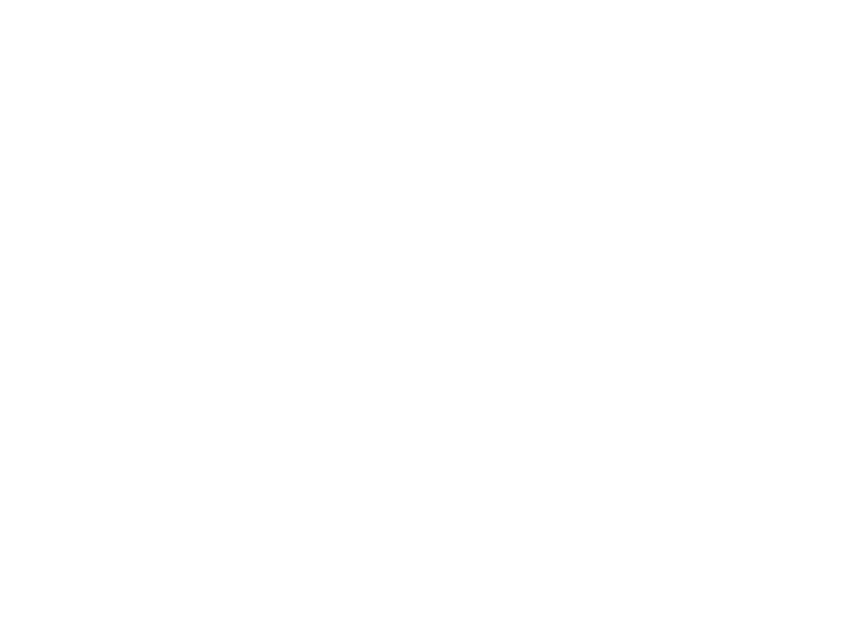

In [40]:
fig_l, ax_l = plt.subplots()
fig_l.suptitle("Lagrange-Interpolation der Modelldaten")

xx = np.arange(0, 10, 0.05)
yy = np.sum(lagrange_basis_polynomials(x, y, xx), axis=0)
            
ax_l.set_xlabel("x")
ax_l.set_ylabel("y")
ax_l.set_xlim(0, 10)
ax_l.set_ylim(0, 10)
ax_l.plot(x, y, "ob", label='Datenpunkte')
plt.legend()

fig_l.savefig('assets/overfit_01.png')

ax_l.plot(xx, β0 + β1*xx, color='gray', linestyle='dashed', label='lineare Regression')
plt.legend()
fig_l.savefig('assets/overfit_02.png')

ax_l.plot(xx, yy, color='gray', label='Interpolationspolynom')
plt.legend()
fig_l.savefig('assets/overfit_03.png')
plt.close()

![overfit_01.png](./assets/overfit_01.png)

![overfit_01.png](./assets/overfit_01.png)

![overfit_02.png](./assets/overfit_02.png)

![overfit_03.png](./assets/overfit_03.png)

Kurvenanpassung an ein Modell, dass komplexer ist als die Daten selbst, nennt man *overfitting*.

*Overfitting* ist schlecht, weil die Modellfunktion gut zu passen scheint, wenn man nur auf die Datenpunkte schaut (Summe der Abstandsquadrate, Residuen). Zwischen den Datenpunkten ist die Anpassung jedoch sehr viel schlechter als beim einfachen Modell!

### Regression mit transformierten Daten

### lineare Regression mit R

```
model.data <- read.csv('modeldata_1.csv')
model.data.lm <- lm(y ~ x, data = model.n)
summary(model.data.lm)
```

```
Call:
lm(formula = y ~ x, data = model.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32248 -0.16957  0.06458  0.08313  0.34516 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.14461    0.16791   6.817 0.000136 ***
x            0.48914    0.02949  16.584 1.77e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2281 on 8 degrees of freedom
Multiple R-squared:  0.9717,	Adjusted R-squared:  0.9682 
F-statistic:   275 on 1 and 8 DF,  p-value: 1.765e-07
```

### Vertrauens- und Vorhersageintervalle



### Korrelation und Kausalität

Korrelation bedeutet nicht, dass es einen ursächlichen Zusammenhang zwischen den Daten geben muss &ndash; hier ein paar Beispiele:

[*Spurious correlations*](https://www.tylervigen.com/spurious-correlations)